In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
anime = pd.read_csv("/content/anime.csv")
ratings = pd.read_csv("/content/rating.csv")


anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
ratings = ratings[ratings['rating'] != -1]
merged = ratings.merge(anime, on='anime_id')[['user_id', 'name', 'rating_x']]

In [12]:
# users who give the most ratings
top_users = merged['user_id'].value_counts().head(10000).index

reduced_data = merged[merged['user_id'].isin(top_users)]



In [13]:
# anime with most ratings
top_anime = reduced_data['name'].value_counts().head(2000).index

reduced_data = reduced_data[reduced_data['name'].isin(top_anime)]




In [15]:
pivot = reduced_data.pivot_table(
    index='name',
    columns='user_id',
    values='rating_x'
).fillna(0)

print("Pivot shape:", pivot.shape)


Pivot shape: (2000, 9999)


In [16]:
similarity = cosine_similarity(pivot)

print("Similarity shape:", similarity.shape)


Similarity shape: (2000, 2000)


In [17]:
def recommend(anime_name, top_n=5):
    if anime_name not in pivot.index:
        return ["Anime not found."]

    idx = pivot.index.get_loc(anime_name)
    scores = list(enumerate(similarity[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    recommendations = [pivot.index[i[0]] for i in sorted_scores[1:top_n+1]]
    return recommendations


In [18]:
recommend("Naruto", 5)


['Death Note',
 'Sword Art Online',
 'Code Geass: Hangyaku no Lelouch',
 'Fullmetal Alchemist: Brotherhood',
 'Bleach']

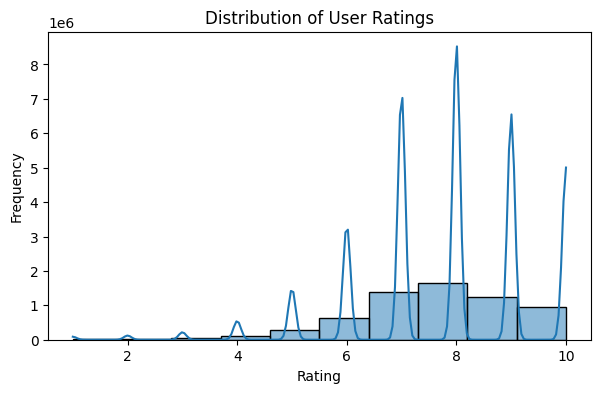

In [22]:
plt.figure(figsize=(7,4))
sns.histplot(merged['rating_x'], bins=10, kde=True)
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


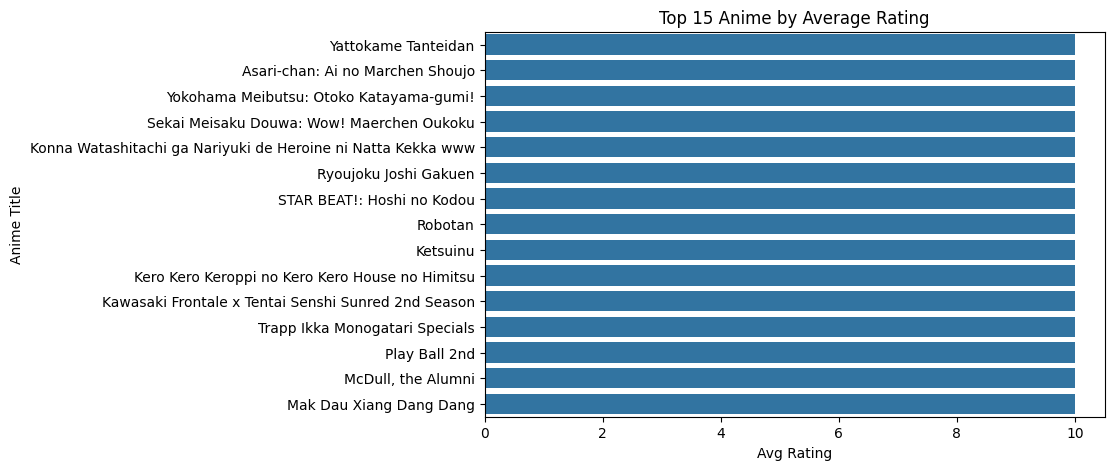

In [23]:
avg_ratings = merged.groupby('name')['rating_x'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index)
plt.title("Top 15 Anime by Average Rating")
plt.xlabel("Avg Rating")
plt.ylabel("Anime Title")
plt.show()


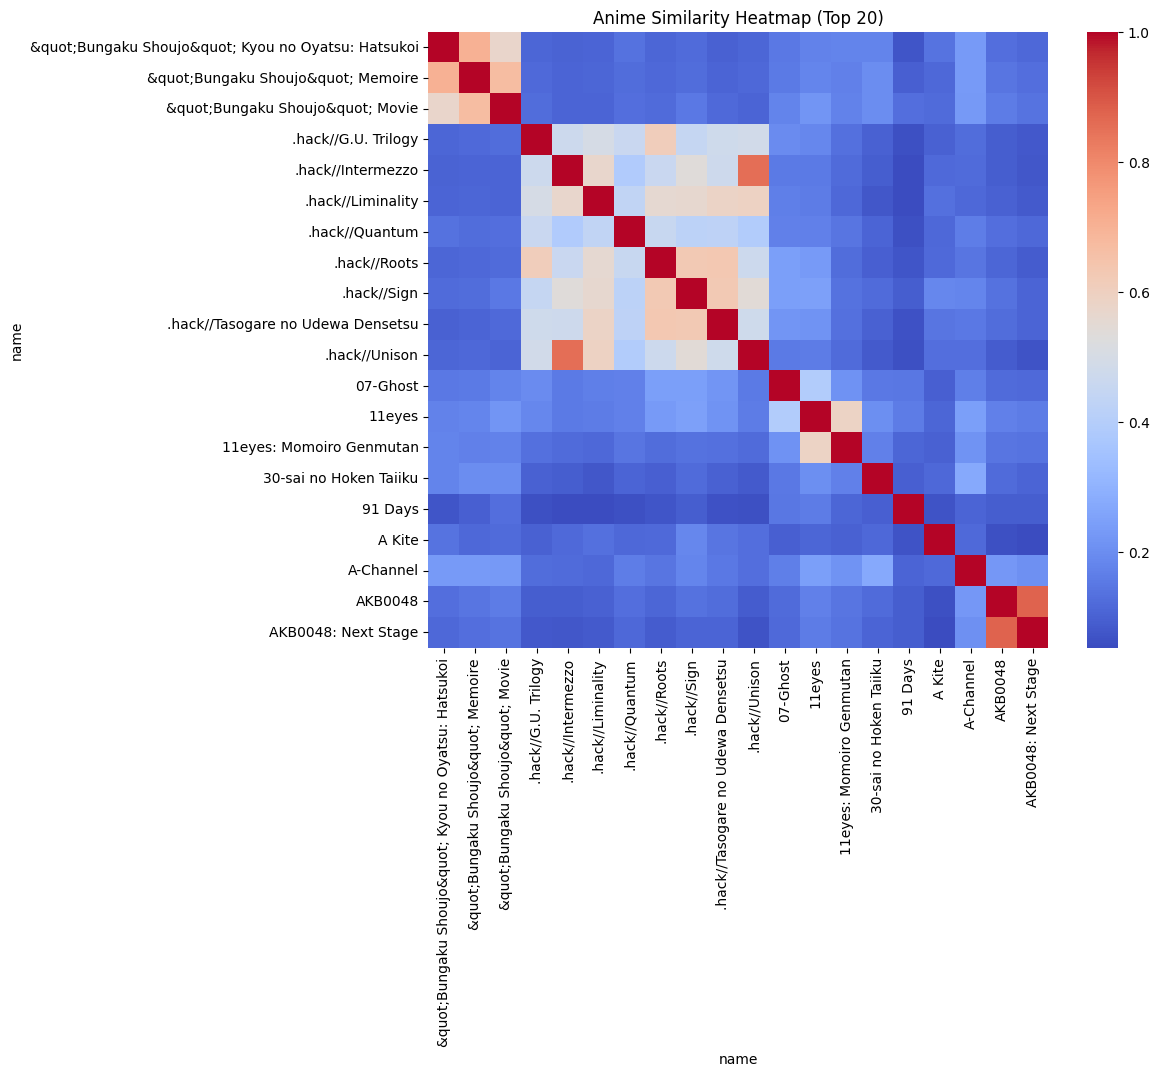

In [25]:
similarity_df = pd.DataFrame(similarity, index=pivot.index, columns=pivot.index)

plt.figure(figsize=(10,8))
sns.heatmap(similarity_df.iloc[:20, :20], cmap="coolwarm")
plt.title("Anime Similarity Heatmap (Top 20)")
plt.show()